#### Import libraries for this project

In [1]:
# Provides functionality to track time
import time  

# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)
sns.set_style('whitegrid') # set style for seaborn

# Statistical Analysis
from scipy import stats

# Mapping on an interactive Leaflet map
import folium as fl

import warnings # ignore warnings
warnings.filterwarnings('ignore')

# Setting for Jupyter Notebooks (visualizations directly below the code)
%matplotlib inline

## 1. Data Understanding

It's important to understand what the data represents, what the values mean, and what problems might occur during cleaning before start cleaning the data. This understanding can be an aid to the selection of the right cleaning techniques and the avoidance of errors.

In [2]:
# Create a DataFrame from CSV file
file_path = 'https://raw.githubusercontent.com/diogo-costa-silva/assets/main/data/nyc_airbnb_open_data/AB_NYC_2019.csv'
df = pd.read_csv(file_path)

# First 5 rows of the DataFrame
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### 1.1. Exploring the dataset

In [3]:
# check how many rows and columns are in the dataset
df.shape

(48895, 16)

In [4]:
# list the column names
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
# Check the Non-Null Count and Dtype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# Detect Missing values
df.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Until now, we can get some insights about the dataset:

- has <b>48,895 rows</b> (entries) and <b>16 columns</b>. 
  
- The columns have different data types, including `int64`, `float64`, and `object`. 
  
- Some columns have <b>missing values</b> (`name`, `host_name`, `last_review`, and `reviews_per_month`), as indicated by the difference between the total number of entries (48,895) and the number of non-null values for those columns.
  
- The majority of the data types seem correct but there are some that maybe could be transformed to another data type:
  - `neighbourhood_group` from <b>object</b> to <b>category</b>
  - `neighbourhood` from <b>object</b> to <b>category</b>
  - `room_type` from <b>object</b> to <b>category</b>
  - `last_review` from <b>object</b> to <b>datetime</b>
  - 
- Another aspect might be renaming `neighbourhood_group` to `borough`

### 1.2. Exploring Numeric Variables

In [7]:
# Exploring numeric variables by analysing their statistics
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### Price:

- <b>Mean</b> ($152.72): This value indicates that, on average, the rental prices in New York City are around $152.72. However, this value can be influenced by very expensive or very cheap rentals, distorting the average.

- <b>Maximum Value</b> ($10,000): This is the highest rental price listed in New York City. It is an extreme value and does not represent the reality of the majority of rentals.

- <b>Minimum Value</b> ($0): This value indicates that there are listings for accommodations that are free. This could be a data entry error or a specific promotion.

- <b>Standard Deviation</b> ($240): This high value indicates that there is a large variation in rental prices. In other words, while some rentals are very cheap, others are very expensive.

- <b>Median</b> ($106): This value indicates that half of the rentals in New York City cost less than $106, and the other half cost more. The median is less sensitive to extreme values and can be a better representation of the “typical rent”.

In summary, rental prices in New York City vary greatly, with some extremely expensive rentals inflating the average. However, the majority of rentals appear to be more affordable, as indicated by the median of $106. The presence of free rentals is intriguing and may be worth further investigation.

#### minimum_nights

- <b>Mean</b> (7 nights): This value indicates that, on average, the rental prices in New York City are around $152.72. However, this value can be influenced by very expensive or very cheap rentals, distorting the average.

- <b>Maximum Value</b> (1250 nights): This is the highest minimum of nights listed in New York City. It is an extreme value and does not represent the reality of the majority of rentals.

- <b>Minimum Value</b> (1 night): This value indicates that there are properties available for people who  only want to spend 1 night.

- <b>Standard Deviation</b> (20,5 nights): This high value indicates that there is a large vaiation in rental prices. In other words, while some rentals are very cheap, others are very expensive.

- <b>Median</b> (3 nights): This value indicates that half of the rentals in New York City are for 3 nights listings. The median is less sensitive to extreme values and can be a better representation of the “typical rent”.


#### number_of_reviews

- <b>Mean</b> (23.3 nights): This value indicates that, on average, the rental prices in New York City are around $152.72. However, this value can be influenced by very expensive or very cheap rentals, distorting the average.

- <b>Maximum Value</b> (629 nights): This is the highest minimum of nights listed in New York City. It is an extreme value and does not represent the reality of the majority of rentals.

- <b>Minimum Value</b> (0 night): This value indicates that there are properties available for people who  only want to spend 1 night.

- <b>Standard Deviation</b> (44.6 nights): This high value indicates that there is a large variation in rental prices. In other words, while some rentals are very cheap, others are very expensive.

- <b>Median</b> (5 nights): This value indicates that half of the rentals in New York City are for 3 nights listings. The median is less sensitive to extreme values and can be a better representation of the “typical rent”.


#### reviews_per_month

- <b>Mean</b> (1.09 reviews): This value indicates that, on average, the rental prices in New York City are around $152.72. However, this value can be influenced by very expensive or very cheap rentals, distorting the average.

- <b>Maximum Value</b> (58.5 reviews): This is the highest minimum of nights listed in New York City. It is an extreme value and does not represent the reality of the majority of rentals.

- <b>Minimum Value</b> (0 reviews): This value indicates that there are properties available for people who  only want to spend 1 night.

- <b>Standard Deviation</b> (1.6 reviews): This high value indicates that there is a large variation in rental prices. In other words, while some rentals are very cheap, others are very expensive.

- <b>Median</b> (0.37 reviews): This value indicates that half of the rentals in New York City are for 3 nights listings. The median is less sensitive to extreme values and can be a better representation of the “typical rent”.


#### calculated_host_listings_count

- <b>Mean</b> (7.14 counts): This value indicates that, on average, the rental prices in New York City are around $152.72. However, this value can be influenced by very expensive or very cheap rentals, distorting the average.

- <b>Maximum Value</b> (327 counts): This is the highest minimum of nights listed in New York City. It is an extreme value and does not represent the reality of the majority of rentals.

- <b>Minimum Value</b> (1 counts): This value indicates that there are properties available for people who  only want to spend 1 night.

- <b>Standard Deviation</b> (32.952519 counts): This high value indicates that there is a large variation in rental prices. In other words, while some rentals are very cheap, others are very expensive.

- <b>Median</b> (1 counts): This value indicates that half of the rentals in New York City are for 3 nights listings. The median is less sensitive to extreme values and can be a better representation of the “typical rent”.


#### availability_365

- <b>Mean</b> (112.8 nights available): This value indicates that, on average, the rental prices in New York City are around $152.72. However, this value can be influenced by very expensive or very cheap rentals, distorting the average.

- <b>Maximum Value</b> (365 nights available): There are rooms that are always available.

- <b>Minimum Value</b> (0 nights available): There are rooms that are never available.

- <b>Standard Deviation</b> (131.6 nights available): This high value indicates that there is a large variation in rental prices. In other words, while some rentals are very cheap, others are very expensive.

- <b>Median</b> (45 nights available): This value indicates that half of the rentals in New York City are for 45 nights available. The median is less sensitive to extreme values and can be a better representation of the “typical rent”.

Here are some observations from the output:

- ‘price’: The minimum price is 0, which seems strange, and the maximum price is 10,000, which is significantly higher than the 75th percentile. It also has high standard deviation.
- ‘minimum_nights’: The maximum value is 1,250, which is much higher than the 75th percentile.
- ‘number_of_reviews’: The maximum value is 629, which is much higher than the 75th percentile.
- ‘reviews_per_month’: The maximum value is 58.5, which is much higher than the 75th percentile.
- ‘calculated_host_listings_count’: The maximum value is 327, which is much higher than the 75th percentile.

All these factors indicate that there may be outliers in these columns.

It is important to investigate these columns further to determine if there are indeed outliers and how they should be handled in the data analysis process.

### 1.3. Exploring Non-Numeric Variables

In [8]:
# Exploring "object" variables by analysing their statistics
df.describe(include='O')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


By analysing this statistics, we now know:

- There are 47905 unique values for `name` where `Hillside Hotel` is the most frequent with 18 appearences.

- There are 11452 unique values for `host_name` where the `Michael` is the most frequent with 417 appearences.

- There are 5 unique values for `neighbourhood_group` where the `Manhattan` is the most frequent with 21661 appearences.

- There are 221 unique values (a little too much??) for `neighbourhood` where the `Williamsburg` is the most frequent with 3920 appearences.

- There are 3 unique values for `room_type` where the `Entire home/apt` is the most frequent with 25409 appearences.

- There are 1764 unique values for `last_review` where `2019-06-23` is the most frequent with 1413 appearences.

#### Check different values for categoric variables

In [9]:
df["neighbourhood_group"].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [10]:
df["neighbourhood"].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [11]:
df["room_type"].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [12]:
# unique values in discrete variables
list(df["neighbourhood_group"].unique())

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [13]:
list(df["room_type"].unique())

['Private room', 'Entire home/apt', 'Shared room']

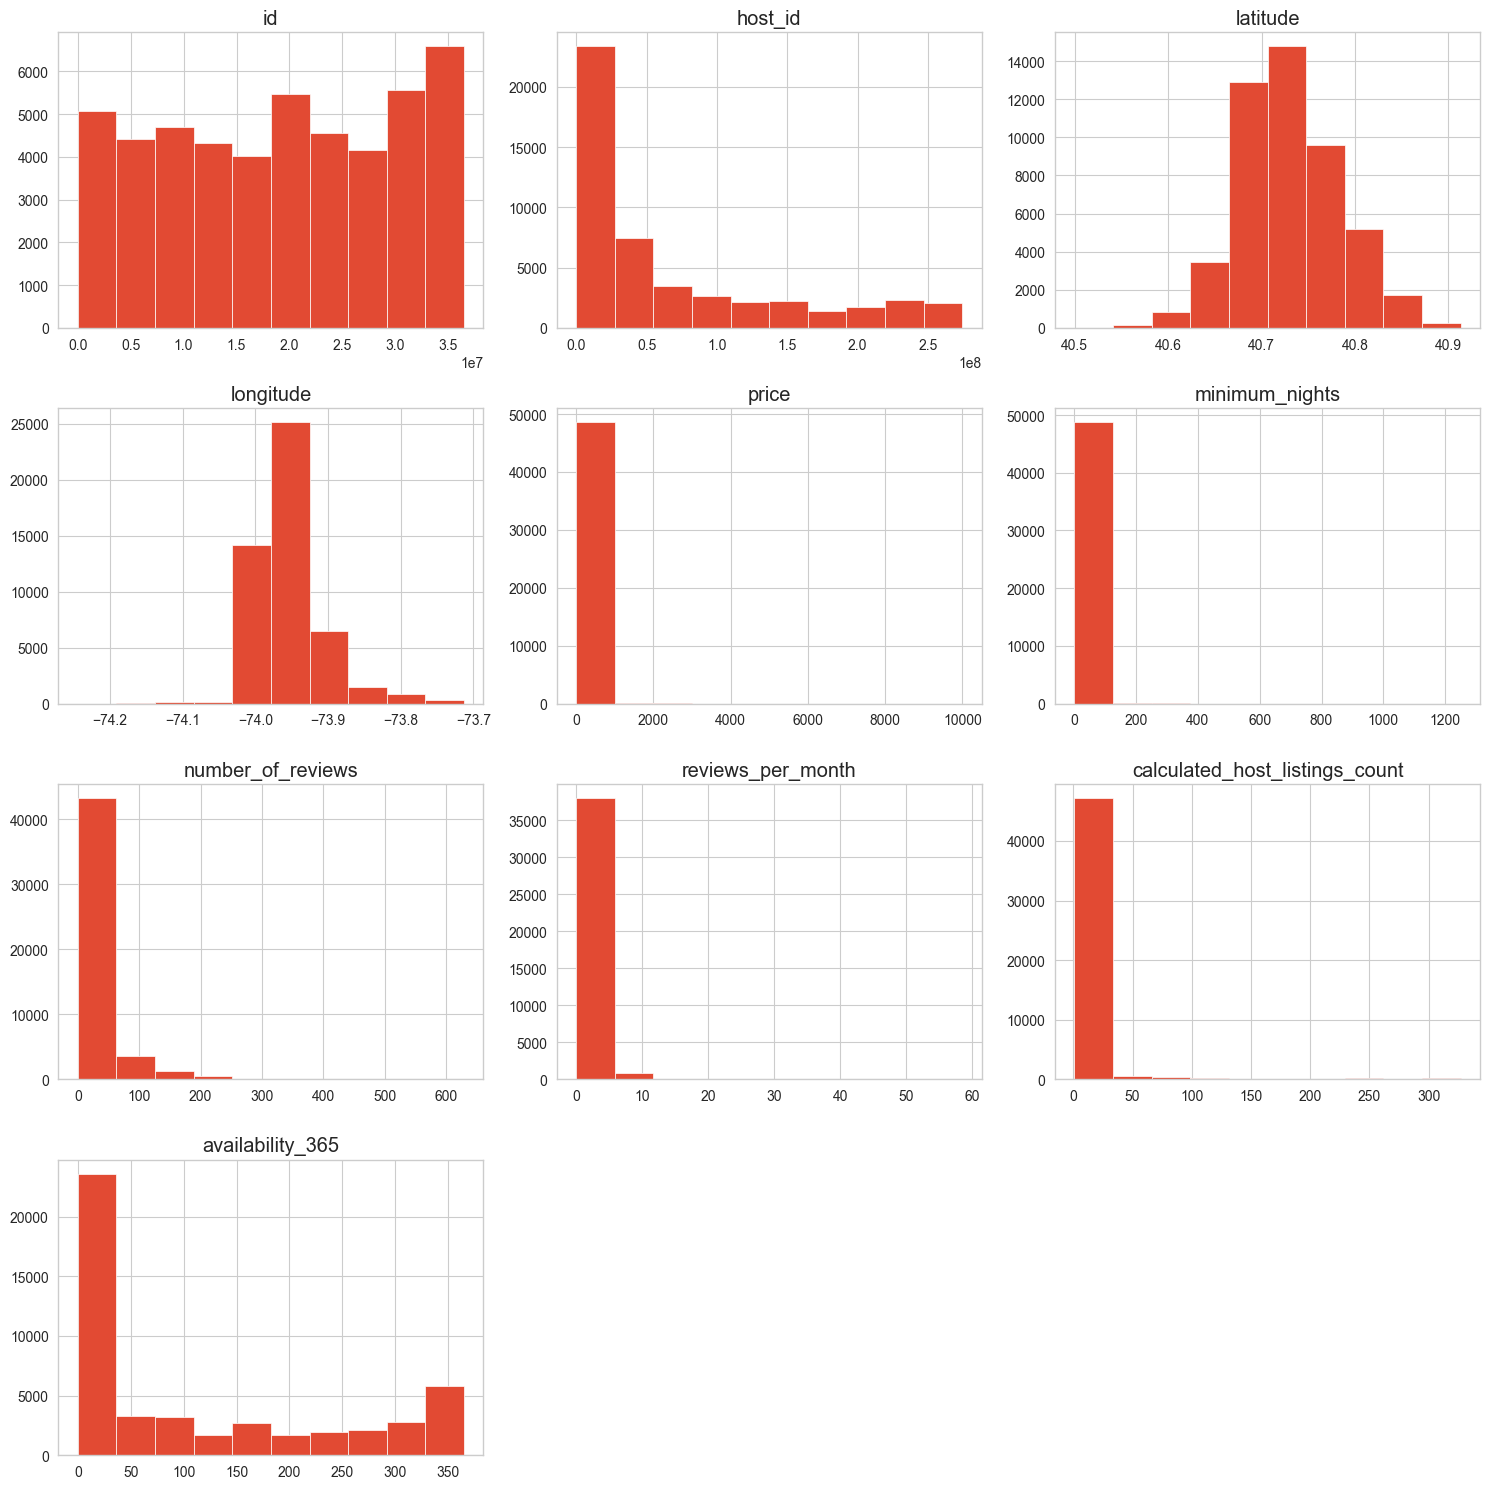

In [14]:
# variable distributions
df.hist(figsize=(15,15))
#set a large figsize if you have > 9 variables
plt.tight_layout()
plt.show()

## 2. Data cleaning 

This stage is a crucial step in the process of data analysis. It involves identifying and correcting errors, inconsistencies, and missing values in a dataset. This process is essential as it ensures the accuracy and completeness of the data before conducting any analysis.

Let's explore the different techniques and tools used in data cleaning, covering topics such as handling missing data, dealing with outliers, and preparing the dataset for analysis.

### 2.1. Rename column names

In [15]:
df.rename(columns={'neighbourhood_group': 'borough'}, inplace=True)

### 2.2. Transform Data Types

Columns ‘neighbourhood_group’, ‘neighbourhood’, and ‘room_type’ are categorical variables, so it’ll be more appropriate to convert them from an object to a category type.

In [16]:
df['borough'] = df['borough'].astype('category')
df['neighbourhood'] = df['neighbourhood'].astype('category')
df['room_type'] = df['room_type'].astype('category')

We can see that ‘last_review’ column contains dates, but it’s type is object. There is a need to change it to a datetime data type. It’ll allow to perform calculations on the dates.

In [17]:
df['last_review'] = pd.to_datetime(df['last_review'])

Now we can see unique categories in these columns:

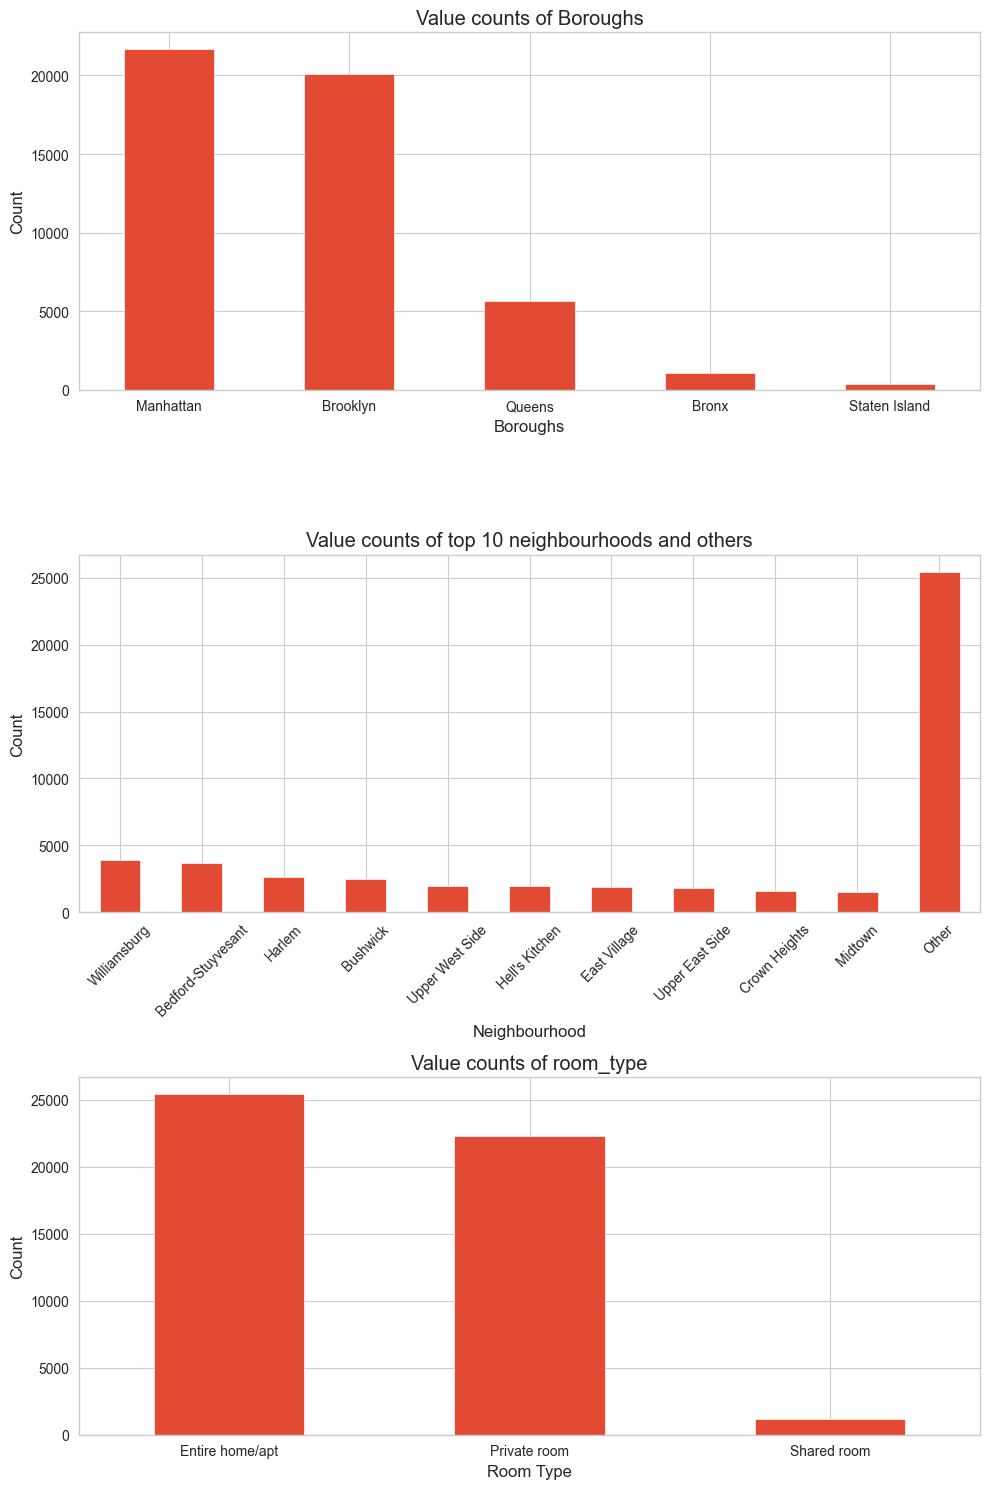

In [18]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))  # 3 rows, 1 column per subplot

# Plotting for 'neighbourhood_group'
df["borough"].value_counts().plot(kind="bar", ax=axs[0])
axs[0].set_title("Value counts of Boroughs")
axs[0].set_xlabel("Boroughs")
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=0)
axs[0].set_ylabel("Count")

# Plotting for 'neighbourhood'
top_neighbourhoods = df["neighbourhood"].value_counts().head(10)
top_neighbourhoods['Other'] = df["neighbourhood"].value_counts().iloc[10:].sum()
top_neighbourhoods.plot(kind="bar", ax=axs[1])
axs[1].set_title("Value counts of top 10 neighbourhoods and others")
axs[1].set_xlabel("Neighbourhood")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)  # Rotation might be needed for better readability
axs[1].set_ylabel("Count")

# Plotting for 'room_type'
df["room_type"].value_counts().plot(kind="bar", ax=axs[2])
axs[2].set_title("Value counts of room_type")
axs[2].set_xlabel("Room Type")
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=0)
axs[2].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [19]:
# Assigning variable
region = df.loc[:, 'borough']

# Extracting unique values from the variable
unique_regions = pd.unique(region)
print('Number of distinct boroughs:', unique_regions)

Number of distinct boroughs: ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
Categories (5, object): ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']


In [20]:
# Check the data types after transformation
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
borough                                 category
neighbourhood                           category
latitude                                 float64
longitude                                float64
room_type                               category
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

### 2.3. Checking duplicated values
Duplicate rows can cause problems in your analysis by inflating the weight of some observations, skewing the results of statistical analyses, or even giving an incorrect impression of the underlying data.

In [21]:
df.duplicated().sum()

0

In [22]:
null = df.isna().sum()/len(df)
null[null > 0].sort_values()

name                 0.000327
host_name            0.000429
last_review          0.205583
reviews_per_month    0.205583
dtype: float64

In [23]:
# Check for duplicate rows
duplicates = df.duplicated()

print("Duplicate Rows:")
print(df[duplicates])

Duplicate Rows:
Empty DataFrame
Columns: [id, name, host_id, host_name, borough, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []


There are no duplicate rows in the dataset.

### 2.3. Missing Data
Missing data can cause problems in your analysis, such as biased results, incorrect statistical inferences, and errors in machine learning models. By identifying missing data, you can decide how to handle it, whether it’s by imputing the missing values or dropping the rows with missing values.

In [24]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
borough                               0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

There are missing values in four columns: ‘name’, ‘host_name’, ‘last_review’, and ‘reviews_per_month’.

#### Techniques to deal with missing data:

- Deletion: You can simply delete the missing values or the entire row or column where they occur. However, this should only be done if the amount of missing data is small and there is no important information in the missing values.
- Imputation: You can impute (fill in) the missing values with some other value or technique. This can be done by replacing missing values with a mean, median, or mode of the data, or by using more sophisticated techniques like regression or machine learning algorithms to predict the missing values.
- Interpolation: You can use interpolation techniques to estimate the missing values by using the values of neighboring data points. This is particularly useful for time series data.
- Data augmentation: You can use data augmentation techniques to create new data points based on existing data points. This can be done by using statistical techniques to generate new values or by using machine learning algorithms to generate new data points.

Considering the fact that ‘name’ column is insignificant for future data analysis, so we can simply replce null values with ‘N/A’.

In [25]:
df.fillna({'name': 'N/A'}, inplace=True)

The ‘host_name’ column is irrelevant and there is no need to store people names. This column can be dropped.

The ‘last_review’ column contains the date of the last review and missing values simply mean that there no reviews for this item. This column is also irrelevant for future data analysis and we can also drop it.

In [26]:
df.drop(['id', 'host_name', 'last_review'], axis=1, inplace=True)

NOTE: The ‘id’ column is often dropped from a dataset during the data cleaning process, because it doesn’t provide any meaningful insights for the analysis.

The ‘reviews_per_month’ column gives information about the number of reviews per month. Since a missing value means the item has no reviews for all time, it has 0 reviews per month.

In [27]:
df.fillna({'reviews_per_month': 0}, inplace=True)

In [28]:
df.isnull().sum()

name                              0
host_id                           0
borough                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

With these operations there are now no missing values in the dataframe.

### 2.4. Outliers
Outliers are data points that are significantly different from other data points in a dataset. They can be much larger or much smaller than the other data points in the dataset and can distort the overall analysis of the data.

There are different techniques to identify outliers, such as using boxplots, scatterplots, or mathematical methods such as the z-score or the interquartile range (IQR). Once outliers are identified, they can be dealt with by either removing them from the dataset, adjusting them to more reasonable values, or treating them as a separate category in the analysis.

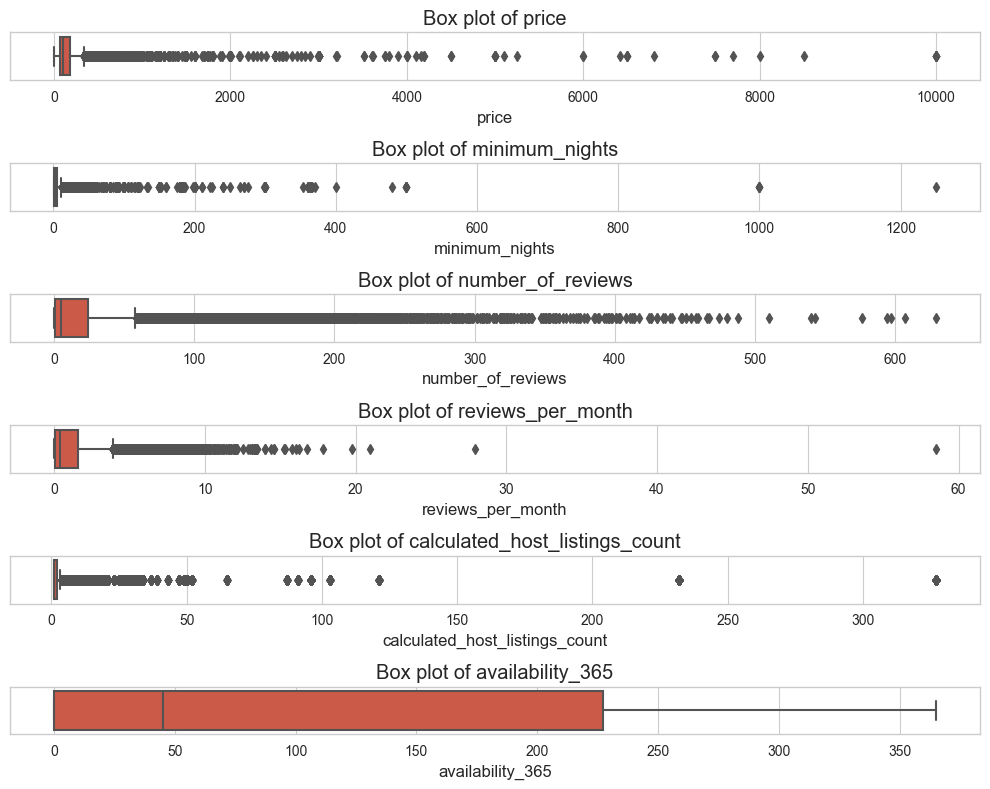

In [29]:
# List of numerical variables to be plotted
numerical_vars = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Set up the matplotlib figure
f, axes = plt.subplots(len(numerical_vars), 1, figsize=(10, 8), sharex=False)

# Create box plots for each numerical variable
for i, var in enumerate(numerical_vars):
    sns.boxplot(x=df[var], ax=axes[i])
    axes[i].set_title(f'Box plot of {var}')

plt.tight_layout()
plt.show()

Now we see that there are indeed some outliers in the numeric columns.

- <b>price</b>: There are several listings with extremely high prices, which are outliers.

- <b>minimum_nights</b>: Some listings have a very high minimum number of nights, which are outliers.

- <b>number_of_reviews</b>: A number of listings have an unusually high number of reviews, indicating outliers.

- <b>reviews_per_month</b>: There are some listings with an extremely high number of reviews per month, which are outliers.

- <b>calculated_host_listings_count</b>: Some hosts have a high number of listings, indicating the presence of outliers.

- <b>availability_365</b>: This variable seems to have a more uniform distribution, with several listings available for many days of the year.

To identify outliers, one common method is the IQR method. The IQR is the range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data. It measures the statistical spread, or dispersion of the data points. Any data point that falls below Q1−1.5×IQR or above Q3+1.5×IQR is considered an outlier.

In [37]:
# Define a function to identify outliers using the IQR method
def identify_outliers(variable):
    # Calculate Q1, Q3, and IQR
    Q1 = variable.quantile(0.25)
    Q3 = variable.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    # Identify the outliers
    outliers = variable[(variable < lower_bound) | (variable > upper_bound)]
    
    return outliers

# Identify outliers for each numerical variable
outliers_dict = {}
for var in numerical_vars:
    outliers = identify_outliers(df[var])
    outliers_dict[var] = {"lower_bound": outliers.min(), "upper_bound": outliers.max(), "count": len(outliers)}

outliers_df = pd.DataFrame(outliers_dict).transpose()
outliers_df


,lower_bound,upper_bound,count
price,335.0,10000.0,2972.0
minimum_nights,12.0,1250.0,6607.0
number_of_reviews,59.0,629.0,6021.0
reviews_per_month,3.9,58.5,3312.0
calculated_host_listings_count,4.0,327.0,7081.0
availability_365,NaN,NaN,0.0


We have identified the outliers in the numerical variables using the IQR method. Here are the results:

- price: There are 2,972 outliers, ranging from $335 to $10,000.

- minimum_nights: There are 6,607 outliers, ranging from 12 to 1,250 nights.

- number_of_reviews: There are 6,021 outliers, ranging from 59 to 629 reviews.

- reviews_per_month: There are 1,793 outliers, ranging from 4.77 to 58.5 reviews per month.

- calculated_host_listings_count: There are 7,081 outliers, ranging from 4 to 327 listings.

- availability_365: There are no outliers identified in this variable.

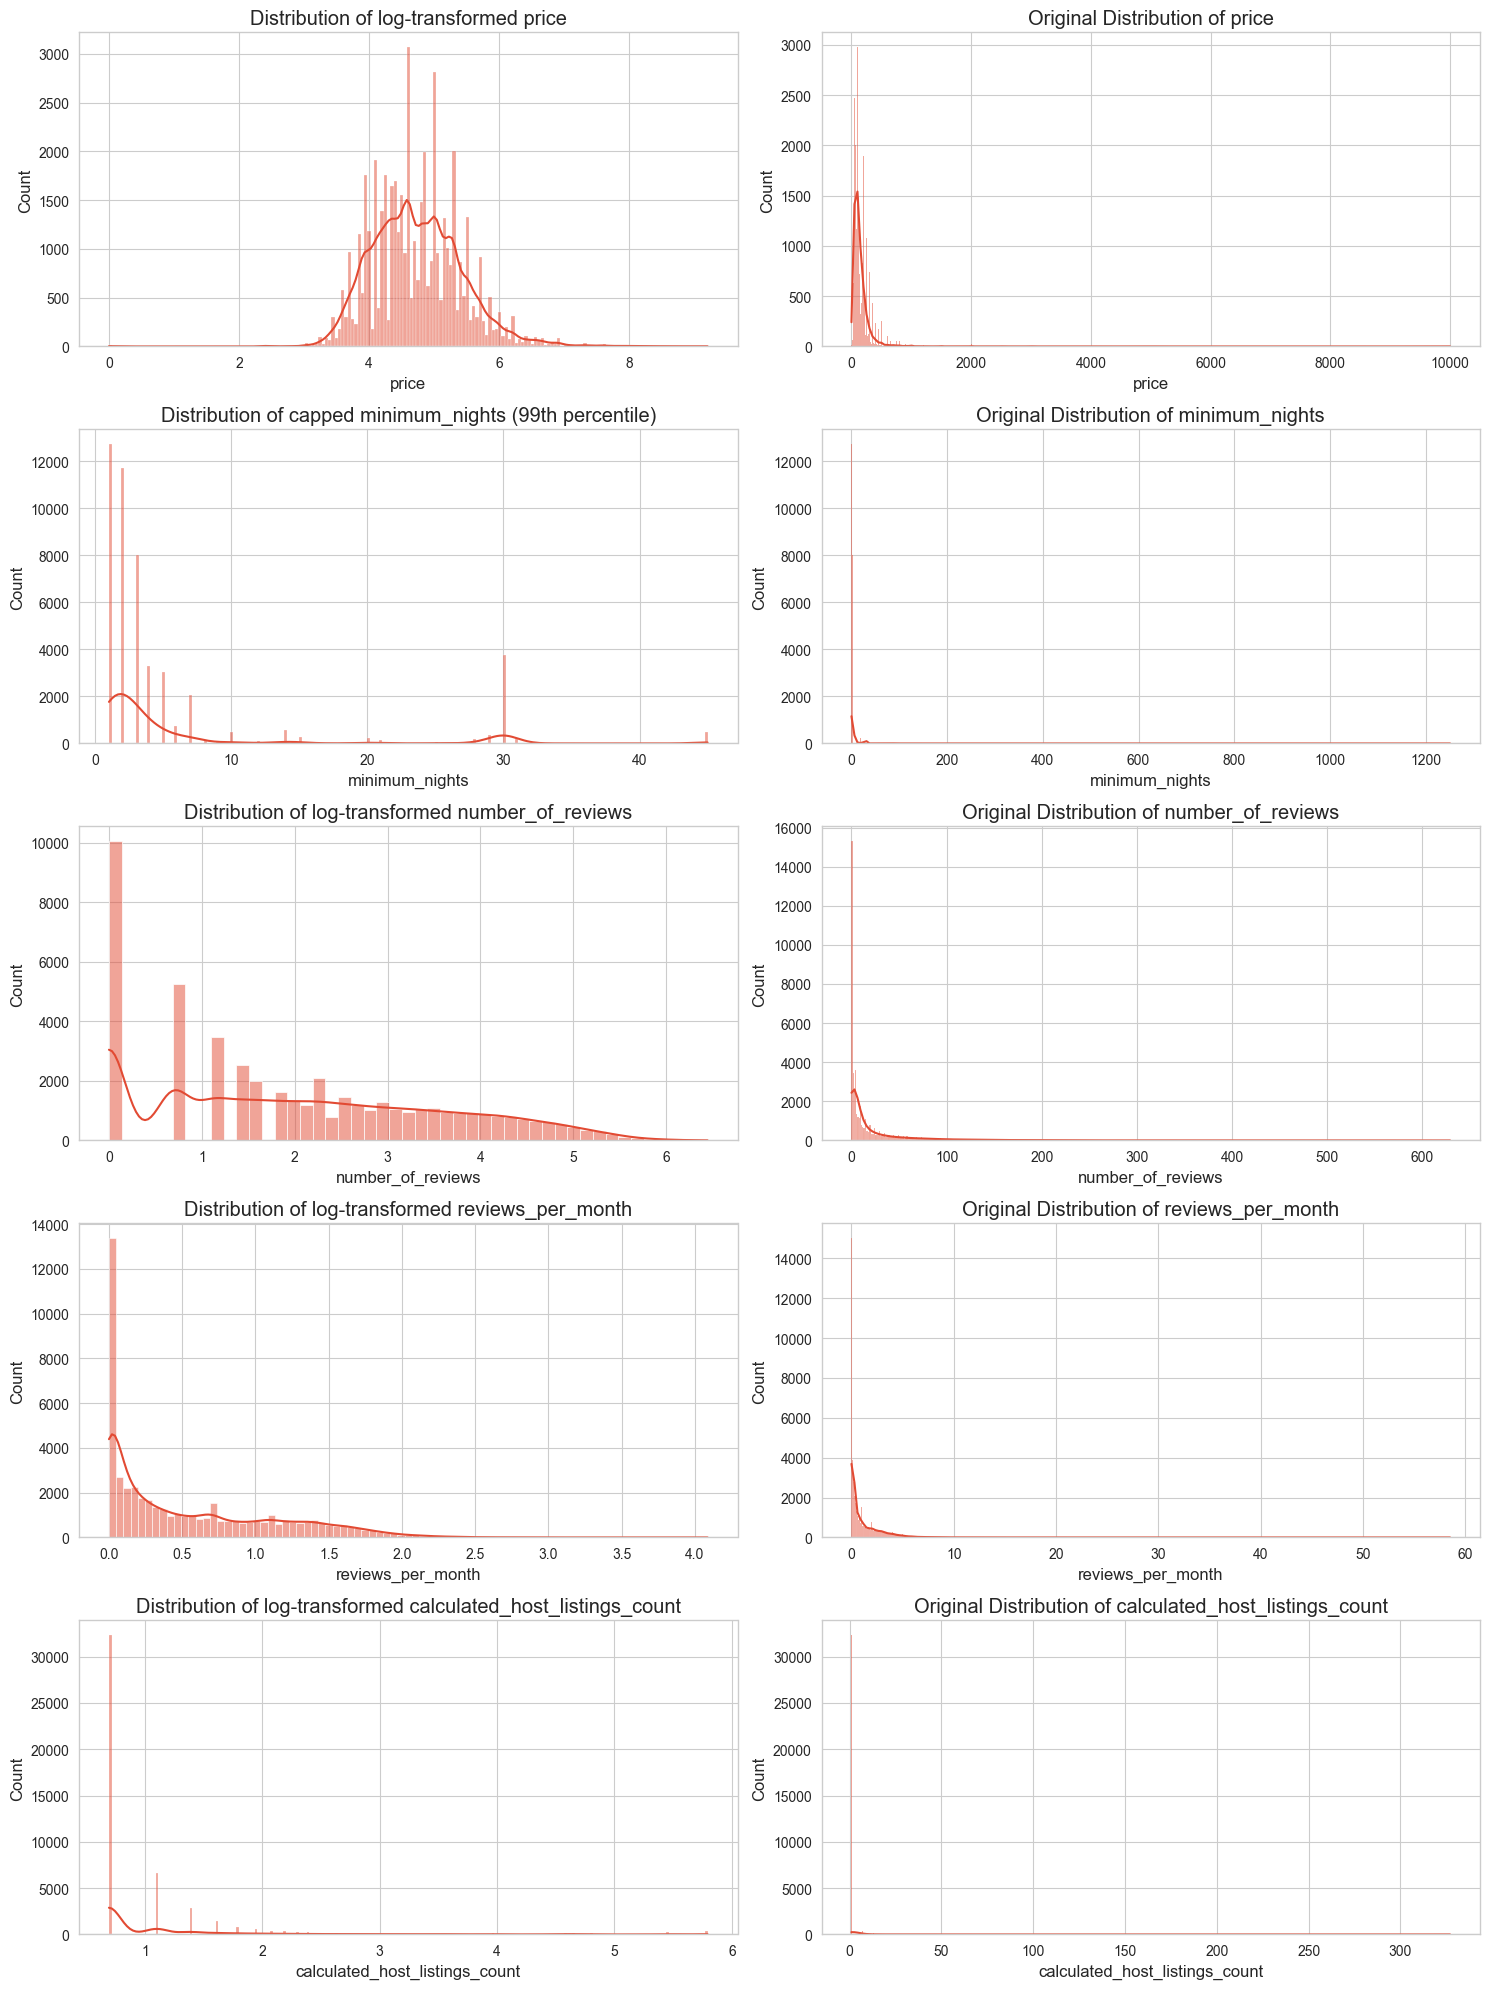

In [40]:
def visualize_log_transformed_distribution(variable, ax):
    transformed_variable = variable.apply(lambda x: np.log1p(x))
    sns.histplot(transformed_variable, kde=True, ax=ax)
    ax.set_title(f'Distribution of log-transformed {variable.name}')

def visualize_capped_distribution(variable, ax, percentile=99):
    cap_value = variable.quantile(percentile / 100)
    capped_variable = variable.apply(lambda x: min(x, cap_value))
    sns.histplot(capped_variable, kde=True, ax=ax)
    ax.set_title(f'Distribution of capped {variable.name} (99th percentile)')

# Ensure that 'df' is the name of your DataFrame and contains the right columns

f, axes = plt.subplots(5, 2, figsize=(15, 20), sharex=False)

# Visualize the original and treated distributions of the variables
visualize_log_transformed_distribution(df['price'], axes[0, 0])
visualize_capped_distribution(df['minimum_nights'], axes[1, 0])
visualize_log_transformed_distribution(df['number_of_reviews'], axes[2, 0])
visualize_log_transformed_distribution(df['reviews_per_month'], axes[3, 0])
visualize_log_transformed_distribution(df['calculated_host_listings_count'], axes[4, 0])

# Plot the original distributions for comparison
sns.histplot(df['price'], kde=True, ax=axes[0, 1]).set_title('Original Distribution of price')
sns.histplot(df['minimum_nights'], kde=True, ax=axes[1, 1]).set_title('Original Distribution of minimum_nights')
sns.histplot(df['number_of_reviews'], kde=True, ax=axes[2, 1]).set_title('Original Distribution of number_of_reviews')
sns.histplot(df['reviews_per_month'], kde=True, ax=axes[3, 1]).set_title('Original Distribution of reviews_per_month')
sns.histplot(df['calculated_host_listings_count'], kde=True, ax=axes[4, 1]).set_title('Original Distribution of calculated_host_listings_count')

plt.tight_layout()
plt.show()


There are several ways to deal with outliers in a dataset:

- Remove the outliers: You can simply remove the rows containing outliers from your dataset. However, this can also lead to loss of information and affect the accuracy of your model. So, you should be careful while removing the outliers and make sure you have a valid reason for doing so.
- Replace the outliers: You can replace the outliers with a value that makes more sense, for example, the mean, median, or mode of the data. This method can help preserve the data and still reduce the effect of outliers.
- Transform the data: You can transform the data using techniques like log transformation, box-cox transformation, etc. This can help in reducing the effect of outliers and also improve the distribution of the data.

In [ ]:
# Define a function to apply logarithmic transformation to a variable
def apply_log_transform(variable):
    return variable.apply(lambda x: np.log1p(x))

# Define a function to cap a variable to the 99th percentile
def apply_capping(variable, percentile=99):
    cap_value = variable.quantile(percentile / 100)
    return variable.apply(lambda x: min(x, cap_value))

# Apply the recommended treatments to the dataset
cleaned_data = data.copy()
cleaned_data['price'] = apply_log_transform(cleaned_data['price'])
cleaned_data['minimum_nights'] = apply_capping(cleaned_data['minimum_nights'])
cleaned_data['number_of_reviews'] = apply_log_transform(cleaned_data['number_of_reviews'])
cleaned_data['reviews_per_month'] = apply_log_transform(cleaned_data['reviews_per_month'])
cleaned_data['calculated_host_listings_count'] = apply_log_transform(cleaned_data['calculated_host_listings_count'])

# Display the head of the cleaned dataset
cleaned_data_head = cleaned_data.head()
cleaned_data_head


The recommended treatments have been applied to the dataset. Here are the transformed columns in the cleaned dataset:

- price: Logarithmic transformation has been applied.

- minimum_nights: Values have been capped to the 99th percentile.

- number_of_reviews: Logarithmic transformation has been applied.

- reviews_per_month: Logarithmic transformation has been applied.

- calculated_host_listings_count: Logarithmic transformation has been applied.


Done!
We have covered the basics of data cleaning, including how to check for and handle duplicates, how to deal with missing data, and how to identify and handle outliers.


## 3. Data Exploration

### 3.1. Calculating Rental Price Statistics

In this code, we are performing calculations on the rental price data. The variable rental_price is assigned the values of the 'price' column from the DataFrame.

In [41]:
# Assigning variable
rental_price = df_wo_outliers.loc[:, 'price']

#Calculate rental price statistics
mean_rent = np.mean(rental_price)
print('The average rental price is: $', round(mean_rent, 2))

max_rent = np.max(rental_price)
print('The maximum rental price is: $', round(max_rent, 2))

min_rent = np.min(rental_price)
print('The minimum rental price is: $', round(min_rent, 2))

rent_std = np.std(rental_price)
print('The standard deviation of rental prices is: $', round(rent_std, 2))

median_rent = np.median(rental_price)
print('The median rental price is: $', round(median_rent, 2))

The average rental price is: $ 138.6
The maximum rental price is: $ 860
The minimum rental price is: $ 0
The standard deviation of rental prices is: $ 107.74
The median rental price is: $ 105.0


- <b>Mean</b> ($138.6): This value indicates that, on average, the rental prices in New York City are around $152.72. However, this value can be influenced by very expensive or very cheap rentals, distorting the average.

- <b>Maximum Value</b> ($860): This is the highest rental price listed in New York City. The previous maximum (10000) was an extreme value and didn't represent the reality of the majority of rentals and therefore was removed because it was an outlier.

- <b>Minimum Value</B> ($0): This value indicates that there are listings for accommodations that are free. This could be a data entry error or a specific promotion.

- <b>Standard Deviation</b> ($107.74): This high value indicates that there is a large variation in rental prices. In other words, while some rentals are very cheap, others are very expensive.

- <b>Median</b> ($105): This value indicates that half of the rentals in New York City cost less than $106, and the other half cost more. The median is less sensitive to extreme values and can be a better representation of the “typical rent”.

In summary, rental prices in New York City vary greatly, with some extremely expensive rentals inflating the average. However, the majority of rentals appear to be more affordable, as indicated by the median of $106. The presence of free rentals is intriguing and may be worth further investigation.